In [1]:
%pylab inline
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [27]:
data = pd.read_csv('./uber-raw-data-apr14.csv')
print(type(data['Date/Time']))
data.info()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [28]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.strip())
data.info()
#data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


In [32]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [36]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)
data.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [37]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)
data.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


Text(0.5, 1.0, 'Frequency by Dom - Uber - APR 2014')

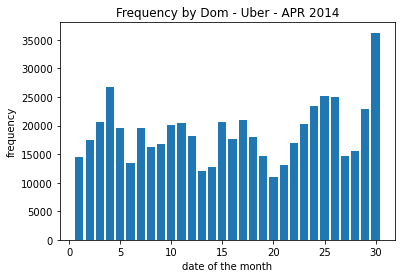

In [41]:
hist(data.dom, bins = 30, rwidth = .8, range = (0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by Dom - Uber - APR 2014')

In [46]:
by_day = data.groupby('dom').size()

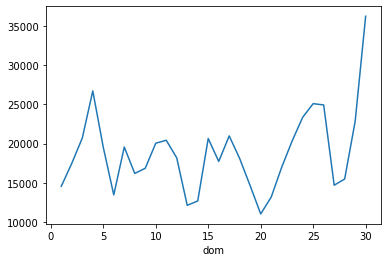

In [48]:
by_day.plot()

Text(0.5, 1.0, 'Frequency by Dom - Uber - APR 2014')

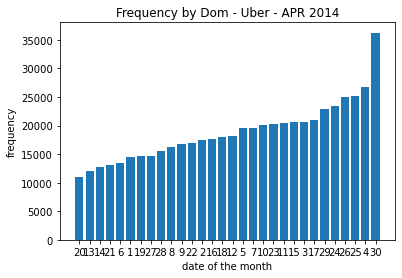

In [49]:
by_day_sorted = by_day.sort_values()
bar(range(1, 31), by_day_sorted)
xticks(range(1, 31), by_day_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by Dom - Uber - APR 2014')

In [53]:
by_cross = data.groupby('weekday hour'.split()).apply(size).unstack()

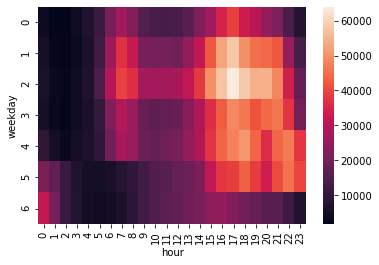

In [54]:
seaborn.heatmap(by_cross)

(40.7, 41.0)

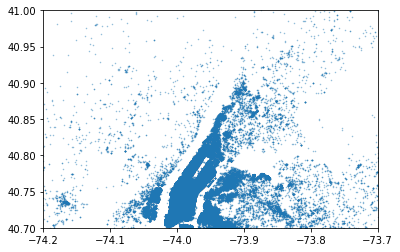

In [56]:
plot(data['Lon'], data['Lat'], '.', ms = 1, alpha = .5)
xlim(-74.2, -73.7)
ylim(40.7, 41)